## Federal_Military_Installations in Maryland

Research question: Does Maryland have sufficient diversification among its military installations?

Source: 
URL: https://catalog.data.gov/dataset/maryland-installation-coordination-buffer- + State of Maryland


Description: This is the data sheet showing all military installations in the state of Maryland.
It depicts different things such as the exact location, branch, occupying military component, and the type of base..


Timeline: this data  was last updated in August 2025, showing the most recent changes to military force in Maryland.

This data set will help answer my research question by showing what Maryland has in terms of military installations, which can lead to showing the diversification of the assets. It is essential to know the military assets of Maryland as it sits right next to nations capital.

In [2]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
df = pd.read_csv("s3://nelms340/Installations-DATA.csv")
df.head()

,the_geom,GIS Object ID,Name,Address,City,State,Military Branch,Military Component,County,Type
0,POINT (-76.18519855835 39.426453754672),89,Aberdeen Proving Ground,2 Halls Cross Road,Aberdeen,MD,Army,Active,Harford,Base
1,POINT (-76.450071036565 39.031344779242),106,U.S. Army Reserve Center,640 Broadneck Road,Annapolis,MD,Army,Reserve,Anne Arundel,Armory
2,POINT (-76.427960280556 38.155218776179),99,U.S. Coast Guard Station - St. Inigoes,P.O. Box 8,St Inigoes,MD,Coast Guard,Active,St. Mary's,Station
3,POINT (-76.966770965662 39.027838386427),105,U.S. Naval Reserve Training Center,2600 Powder Mill Road,Hyattsville,MD,Navy,Reserve,Montgomery,Base
4,POINT (-76.41917592309 38.280513406932),84,Naval Air Station Patuxent River,22268 Cedar Point Road,Patuxent River,MD,Navy,Active,St. Mary's,Naval Air Station


# Cleaning

Information:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   the_geom            29 non-null     object
 1   GIS Object ID       29 non-null     int64 
 2   Name                29 non-null     object
 3   Address             29 non-null     object
 4   City                29 non-null     object
 5   State               29 non-null     object
 6   Military Branch     29 non-null     object
 7   Military Component  29 non-null     object
 8   County              29 non-null     object
 9   Type                29 non-null     object
dtypes: int64(1), object(9)
memory usage: 2.4+ KB


In [4]:
df.describe()

,GIS Object ID
count,29.000000
mean,93.620690
std,10.258842
min,78.000000
25%,85.000000
50%,93.000000
75%,102.000000
max,111.000000


How many rows and columns exist:

In [5]:
df.shape

(29, 10)

Looking for missing values:

In [6]:
df.isnull().sum()

the_geom              0
GIS Object ID         0
Name                  0
Address               0
City                  0
State                 0
Military Branch       0
Military Component    0
County                0
Type                  0
dtype: int64

None Found 

In [7]:
import pandas as pd
import re


# --- 🔍 Auto-detect columns that match what we need ---
def find_col(candidates):
    for col in df.columns:
        for c in candidates:
            if c.lower() in col.lower():
                return col
    return None

component_col = find_col(["component", "status", "force component", "service component"])
basis_col = find_col(["basis", "type", "category", "basis type"])

print(f"Detected columns -> Component: {component_col}, Basis: {basis_col}")
if not component_col or not basis_col:
    raise ValueError("Couldn't detect the needed columns. Check your column headers with df.columns.")

# --- 1️⃣ Create NEW VARIABLE ---
df["Is_ActiveDuty"] = df[component_col].apply(
    lambda x: 1 if re.search("active", str(x).lower()) else 0
)

# --- 2️⃣ Create SUMMARY TABLE ---
summary_table = (
    df.groupby(basis_col)
      .agg(
          Total_Records=(component_col, "count"),
          ActiveDuty_Count=("Is_ActiveDuty", "sum"),
          Reserve_Count=("Is_ActiveDuty", lambda s: (1 - s).sum())
      )
      .assign(
          ActiveDuty_Percent=lambda d: round(100 * d["ActiveDuty_Count"] / d["Total_Records"], 1)
      )
      .reset_index()
)


print("✅ Summary table created and saved as 'Installations_Summary_By_Basis.csv'")
print(summary_table.head())


Detected columns -> Component: Military Component, Basis: Type
✅ Summary table created and saved as 'Installations_Summary_By_Basis.csv'
                Type  Total_Records  ActiveDuty_Count  Reserve_Count  \
0              Annex              2                 2              0   
1             Armory              2                 0              2   
2               Base             13                10              3   
3           Hospital              1                 1              0   
4  Naval Air Station              1                 1              0   

   ActiveDuty_Percent  
0               100.0  
1                 0.0  
2                76.9  
3               100.0  
4               100.0  


This helps to show the different types of military installations in Maryland. 
This information can show whether there is a lack of needed infrastructure for defense.

Detected columns -> Branch: Military Branch, Basis: Type


,Military Branch,Number_of_Bases
1,Army,4
3,Navy,4
0,Air Force,3
2,Coast Guard,2


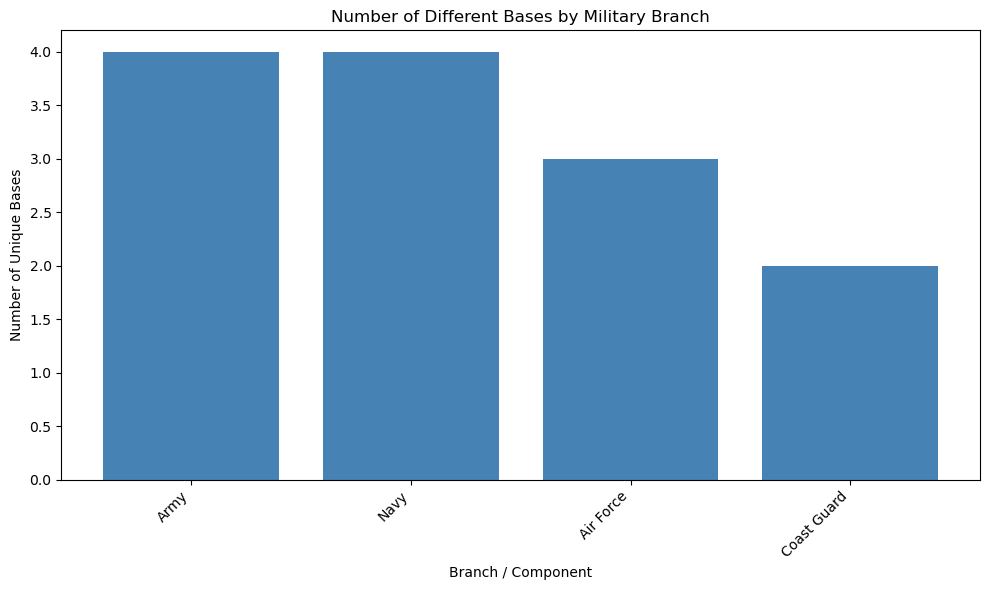

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import re

# --- Assume df already exists in memory ---
# Example: df.head() should show your data

# Auto-detect likely columns for branch and base/basis
def find_col(candidates):
    for col in df.columns:
        for c in candidates:
            if c.lower() in col.lower():
                return col
    return None

branch_col = find_col(["branch", "service", "component", "force"])
basis_col = find_col(["basis", "base", "installation", "category", "type"])

print(f"Detected columns -> Branch: {branch_col}, Basis: {basis_col}")

# --- Build summary table ---
summary_table = (
    df.groupby(branch_col)
      .agg(Number_of_Bases=(basis_col, "nunique"))
      .reset_index()
      .sort_values("Number_of_Bases", ascending=False)
)

# Display the summary table
display(summary_table)

# --- Visualization ---
plt.figure(figsize=(10, 6))
plt.bar(summary_table[branch_col], summary_table["Number_of_Bases"], color="steelblue")
plt.title("Number of Different Bases by Military Branch")
plt.xlabel("Branch / Component")
plt.ylabel("Number of Unique Bases")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


This chart shows the diversification between military services with bases in Maryland. In the chart, we can see a mostly even diversification between most services. However, there are no Marine Corps bases represented in Maryland.

Detected columns -> Component: Military Branch, Basis: Type


,_Component,Num_Bases
0,Active,7
1,Reserve,2


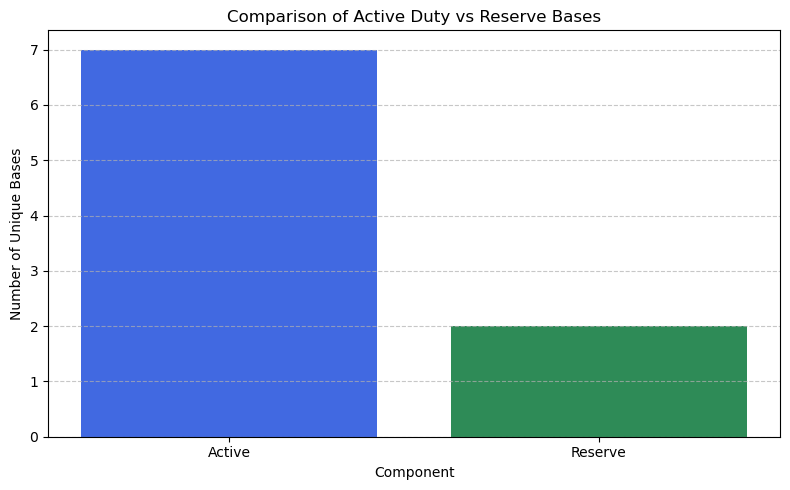

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# --- Assume df already exists in memory ---

# Auto-detect component and base/basis columns
def find_col(df, candidates):
    for col in df.columns:
        for c in candidates:
            if c.lower() in col.lower():
                return col
    return None

component_col = find_col(df, ["component", "status", "service", "branch", "force"])
basis_col = find_col(df, ["basis", "base", "installation", "category", "type"])

print(f"Detected columns -> Component: {component_col}, Basis: {basis_col}")

# --- Clean and standardize component names ---
def standardize_component(x):
    s = str(x).lower()
    if "active" in s:
        return "Active Duty"
    elif "reserve" in s or "guard" in s:
        return "Reserve"
    else:
        return "Active"

df["_Component"] = df[component_col].apply(standardize_component)

# --- Create summary (count of bases by component) ---
summary = (
    df.groupby("_Component")
      .agg(Num_Bases=(basis_col, "nunique"))
      .reset_index()
      .sort_values("Num_Bases", ascending=False)
)

# --- Display results as DataFrame ---
display(summary)

# --- Create bar chart ---
plt.figure(figsize=(8, 5))
plt.bar(summary["_Component"], summary["Num_Bases"], color=["royalblue", "seagreen"])
plt.title("Comparison of Active Duty vs Reserve Bases")
plt.xlabel("Component")
plt.ylabel("Number of Unique Bases")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


This graph shows the differences between active duty military bases versus reserve military bases. There are far more active duty bases than there are reserve bases in the state of Maryland.

,_fips,Count
0,24003,6
2,24017,3
6,24031,3
8,24037,3
1,24009,2
11,24047,2
4,24025,2
7,24033,2
12,24510,2
3,24021,1


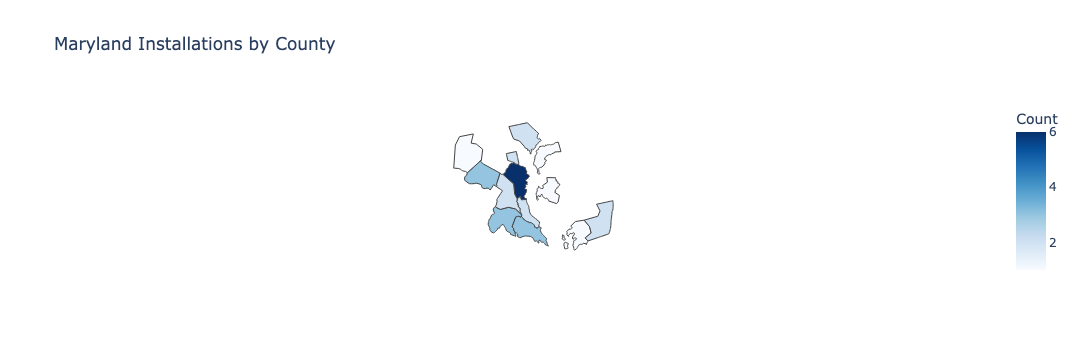

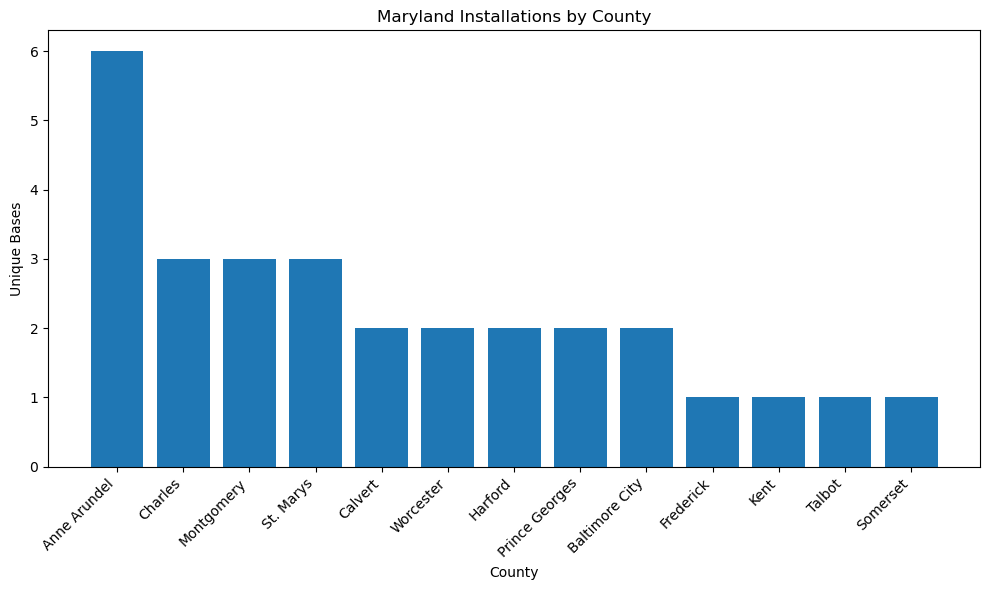

In [15]:
import re
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# ---------- 0) Auto-detect columns ----------
def find_col(frame, candidates):
    for col in frame.columns:
        for c in candidates:
            if c.lower() in col.lower():
                return col
    return None

state_col = find_col(df, ["state", "location", "region"])
county_col = find_col(df, ["county", "county_name", "county/city", "jurisdiction", "location_county"])
base_col = find_col(df, ["installation", "base", "post", "facility", "site", "basis", "name"])

if state_col is None:
    raise ValueError("Couldn't find a State column (e.g., 'State'). Check df.columns.")
if county_col is None:
    raise ValueError("Couldn't find a County column (e.g., 'County'). Check df.columns.")

# ---------- 1) Filter to Maryland (handles 'Maryland' or 'MD') ----------
s = df[state_col].astype(str).str.strip()
md_mask = s.str.fullmatch(r"(?i)MD") | s.str.contains(r"(?i)\bmaryland\b")
df_md = df[md_mask].copy()

if df_md.empty:
    raise ValueError("No rows for Maryland/MD found. Check your State values.")

# ---------- 2) Normalize county names ----------
def norm_county(x: str) -> str:
    s = re.sub(r"county\b", "", str(x), flags=re.I).strip()
    s = re.sub(r"city of\s+", "", s, flags=re.I).strip()
    s = re.sub(r"[^\w\s-]", "", s)  # remove punctuation
    s = re.sub(r"\s+", " ", s).strip().lower()
    # unify a few common variants
    repl = {
        "baltimore": "baltimore city",  # MD treats Baltimore City separately
        "st marys": "st. marys",
        "queen annes": "queen annes",
        "prince georges": "prince georges",
    }
    return repl.get(s, s)

df_md["_county_std"] = df_md[county_col].apply(norm_county)

# ---------- 3) Maryland county -> FIPS mapping (24 counties + Baltimore City) ----------
md_county_to_fips = {
    "allegany":"24001",
    "anne arundel":"24003",
    "baltimore county":"24005",   # (rarely used if your data differentiates)
    "baltimore city":"24510",     # independent city
    "calvert":"24009",
    "caroline":"24011",
    "carroll":"24013",
    "cecil":"24015",
    "charles":"24017",
    "dorchester":"24019",
    "frederick":"24021",
    "garrett":"24023",
    "harford":"24025",
    "howard":"24027",
    "kent":"24029",
    "montgomery":"24031",
    "prince georges":"24033",
    "queen annes":"24035",
    "somerset":"24039",
    "st. marys":"24037",
    "talbot":"24041",
    "washington":"24043",
    "wicomico":"24045",
    "worcester":"24047",
}

# Heuristic: if someone wrote just "baltimore", we already normalized to "baltimore city" above
# but if your data uses "Baltimore County", keep it as such:
def map_to_fips(name: str) -> str | None:
    s = name
    # try exact
    if s in md_county_to_fips:
        return md_county_to_fips[s]
    # attempt "xxx county" if not present
    if not s.endswith("county") and s not in ("baltimore city", "st. marys", "prince georges", "queen annes"):
        guess = f"{s} county"
        return md_county_to_fips.get(guess, None)
    return None

df_md["_fips"] = df_md["_county_std"].apply(map_to_fips)

# Drop rows we can't map
df_md = df_md[df_md["_fips"].notna()].copy()
if df_md.empty:
    raise ValueError("No Maryland rows could be mapped to county FIPS. Check your county names.")

# ---------- 4) Summarize: installations per county ----------
if base_col:
    county_summary = (df_md.groupby("_fips")[base_col]
                          .nunique()
                          .reset_index(name="Count"))
else:
    county_summary = (df_md.groupby("_fips")
                          .size()
                          .reset_index(name="Count"))

# Optional: show a quick DataFrame of FIPS + Count
display(county_summary.sort_values("Count", ascending=False).head(15))

# ---------- 5a) Choropleth of Maryland counties (internet required for GeoJSON URL) ----------
try:
    fig = px.choropleth(
        county_summary,
        geojson="https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json",
        locations="_fips",
        color="Count",
        scope="usa",
        title="Maryland Installations by County",
        color_continuous_scale="Blues"
    )
    # Fit & zoom to MD
    fig.update_geos(fitbounds="locations", visible=False)
    fig.show()
except Exception as e:
    print("Choropleth failed (likely no internet). Showing bar chart fallback instead.")
    print("Error:", e)

# ---------- 5b) ALWAYS have a bar chart fallback (no internet needed) ----------
# Map FIPS back to pretty county labels for the bars
inv_map = {v: k.title() for k, v in md_county_to_fips.items()}
bar_data = county_summary.assign(County=county_summary["_fips"].map(inv_map)).sort_values("Count", ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(bar_data["County"], bar_data["Count"])
plt.title("Maryland Installations by County")
plt.xlabel("County")
plt.ylabel("Count of Installations" if not base_col else "Unique Bases")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


This graph shows the dispositions of the various military installations throughout Maryland showing that they are widely spread out throughout the state.